In [37]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *
from tensorflow.keras.utils import load_img,img_to_array


## **Read Dataset**

In [6]:
train_path = 'Vegetable Images/train'
test_path = 'Vegetable Images/test'
validation_path = 'Vegetable Images/validation'

In [7]:
image_classes = os.listdir('Vegetable Images/train')
image_classes

['Capsicum',
 'Bitter_Gourd',
 'Papaya',
 'Tomato',
 'Radish',
 'Bottle_Gourd',
 'Cabbage',
 'Broccoli',
 'Pumpkin',
 'Carrot',
 'Potato',
 'Cucumber',
 'Brinjal',
 'Cauliflower',
 'Bean']

## **Data Visualization**

In [8]:
def plot_images(image_classes):
    plt.figure(figsize = (14,14))
    
    for i, category in enumerate(image_classes):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(4, 4, i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

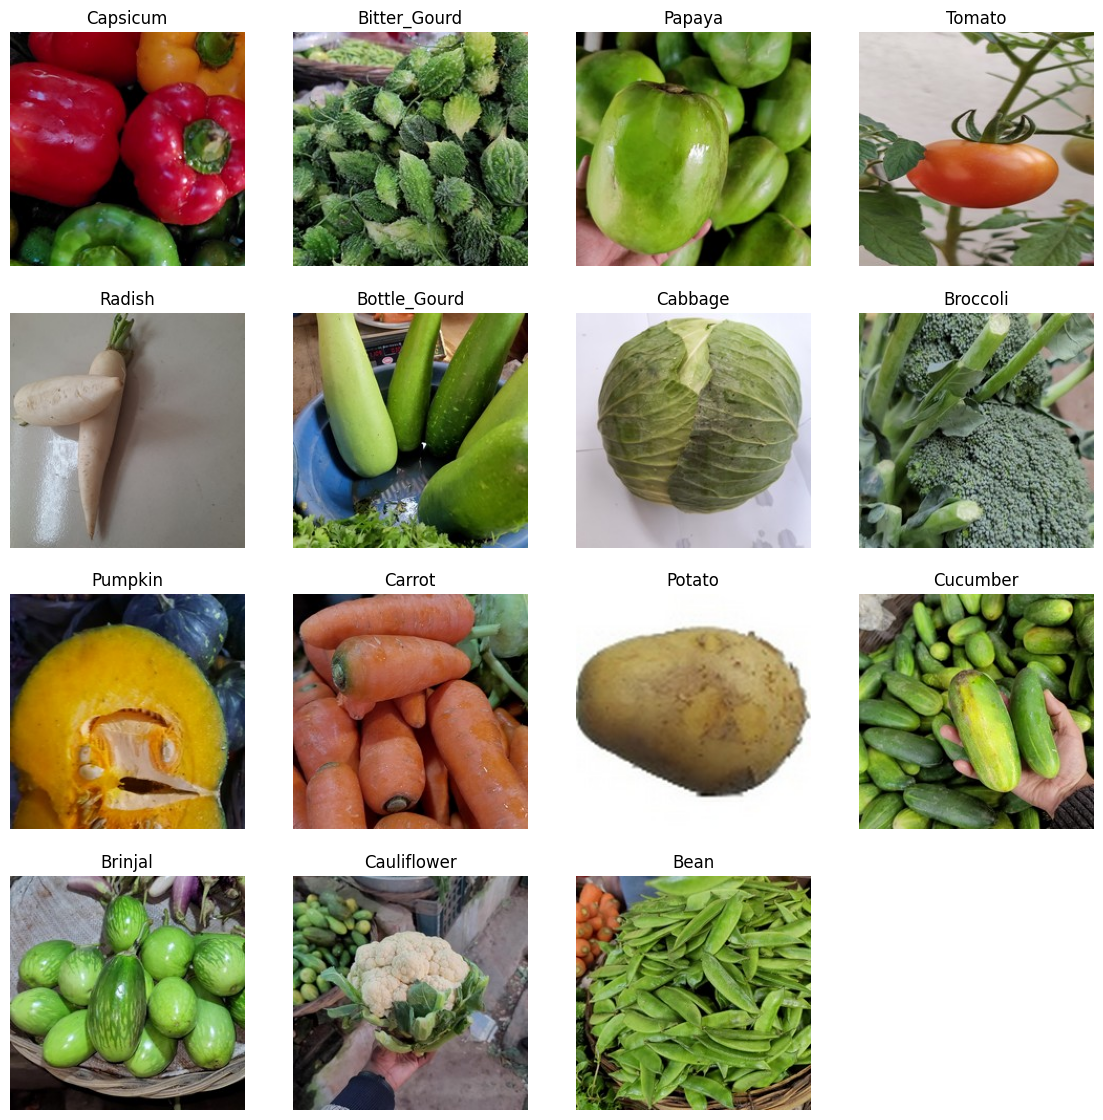

In [9]:
plot_images(image_classes)

## **Image Preprocessing**

In [10]:
image_generator = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_data = image_generator.flow_from_directory(train_path,
                                                target_size = (150, 150),
                                                batch_size = 64,
                                                class_mode = 'categorical')

Found 15000 images belonging to 15 classes.


In [ ]:
test_data = image_generator.flow_from_directory(test_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


In [ ]:
val_data = image_generator.flow_from_directory(validation_path,
                                                target_size = (150, 150),
                                                batch_size = 32,
                                                class_mode = 'categorical')

Found 3000 images belonging to 15 classes.


## **Model Building**

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size =  3, padding = 'same',
                activation = 'relu', input_shape = [150,150, 3]))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 64, kernel_size =  3, padding = 'same',
                activation = 'relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))

model.add(Dense(15, activation = 'softmax'))

/home/halem/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1732542421.676439    9657 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-11-25 15:47:01.733916: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2024-11-25 15:47:01.748094: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% o

## **Model Compile & Fit**

In [15]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
model_history = model.fit(train_data,
                         epochs = 5,
                         validation_data = test_data)

/home/halem/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


2024-11-25 15:47:02.577050: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 44859392 exceeds 10% of free system memory.
2024-11-25 15:47:03.203027: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 184320000 exceeds 10% of free system memory.


235/235 ━━━━━━━━━━━━━━━━━━━━ 241s 1s/step - accuracy: 0.3915 - loss: 2.2537 - val_accuracy: 0.8443 - val_loss: 0.5171
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.8837 - loss: 0.3785 - val_accuracy: 0.8330 - val_loss: 0.5385
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.9460 - loss: 0.1793 - val_accuracy: 0.9343 - val_loss: 0.2427
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 227s 907ms/step - accuracy: 0.9766 - loss: 0.0823 - val_accuracy: 0.9243 - val_loss: 0.2829
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 239s 1s/step - accuracy: 0.9829 - loss: 0.0582 - val_accuracy: 0.9283 - val_loss: 0.2865


## **Model Performance Visualization**

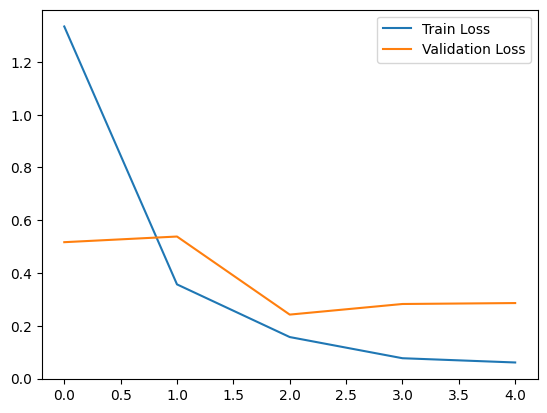

In [17]:
plt.plot(model_history.history['loss'], label = 'Train Loss')
plt.plot(model_history.history['val_loss'], label = 'Validation Loss')
plt.legend()
plt.show()

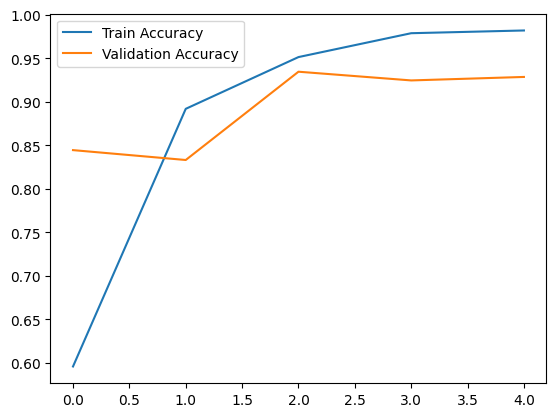

In [18]:
plt.plot(model_history.history['accuracy'], label = 'Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.show()

## **Model Evaluation**

In [19]:
model.evaluate(test_data)

94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 149ms/step - accuracy: 0.9357 - loss: 0.2550


[0.27045828104019165, 0.9269999861717224]

In [20]:
model.evaluate(train_data)

235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 269ms/step - accuracy: 0.9919 - loss: 0.0329


[0.032822247594594955, 0.9922000169754028]

In [33]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,236,305 (42.86 MB)

 Trainable params: 11,236,303 (42.86 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## **Model Save**

In [21]:
model.save('model.h5')

In [22]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')

In [47]:
image_path = "Vegetable Images/train/Tomato/0003.jpg"
img = image.load_img(image_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0) 

In [48]:
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
predicted_class = image_classes[predicted_class_index]

print(f"The image is predicted to be: {predicted_class}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
The image is predicted to be: Bean
